H0 = Todo los tratamientos son iguales
H1 = Hay diferencia en los tratamientos

In [178]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [147]:
df = pd.read_csv("ensayo-productos-1.tsv", delimiter="\t")

In [149]:
def getCalibre(x):
    if x == 'L':
        return round(random.uniform(22,24), 1)
    if x == 'XL':
        return round(random.uniform(24,26), 1)
    if x == 'J':
        return round(random.uniform(26,28), 1)
    if x == '2J':
        return round(random.uniform(28,30), 1)
    if x == '3J':
        return round(random.uniform(30,32), 1)
    if x == '4J':
        return round(random.uniform(32,34), 1)

def getColor(x):
    if x == 'Blanca':
        return 1
    if x == 'Clara':
        return 2
    if x == 'Oscura':
        return 3

In [150]:
#identifiers = df['TRATAMIENTOS'].unique().tolist()
df['CALIBRE'] = df.CALIBRE.apply(func=getCalibre)
df['COLOR'] = df.COLOR.apply(func=getColor)
df.head(20)
#

,TRATAMIENTO,COLOR,PESO,CALIBRE,BRIX
0,T0,1,4.8,23.5,11
1,T0,1,6.0,23.0,13
2,T0,1,5.4,22.3,11
3,T0,2,6.5,22.7,13
4,T0,2,5.5,22.0,13
5,T0,2,6.6,25.2,15
6,T0,2,4.4,22.5,13
7,T0,2,8.3,27.6,14
8,T0,2,8.1,25.8,14
9,T0,2,9.0,26.8,18


<Axes: xlabel='TRATAMIENTO', ylabel='PESO'>

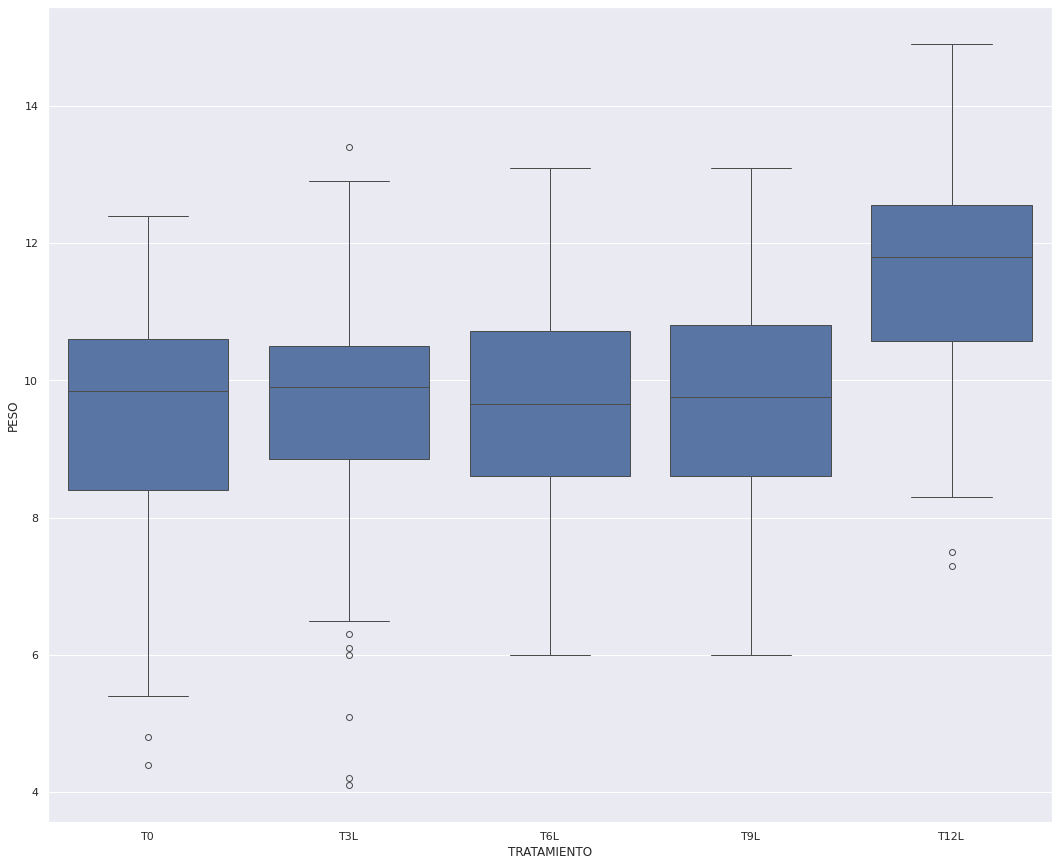

In [152]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(18, 15)})
sns.boxplot(data=df, x="TRATAMIENTO", y="PESO")

<Axes: xlabel='TRATAMIENTO', ylabel='CALIBRE'>

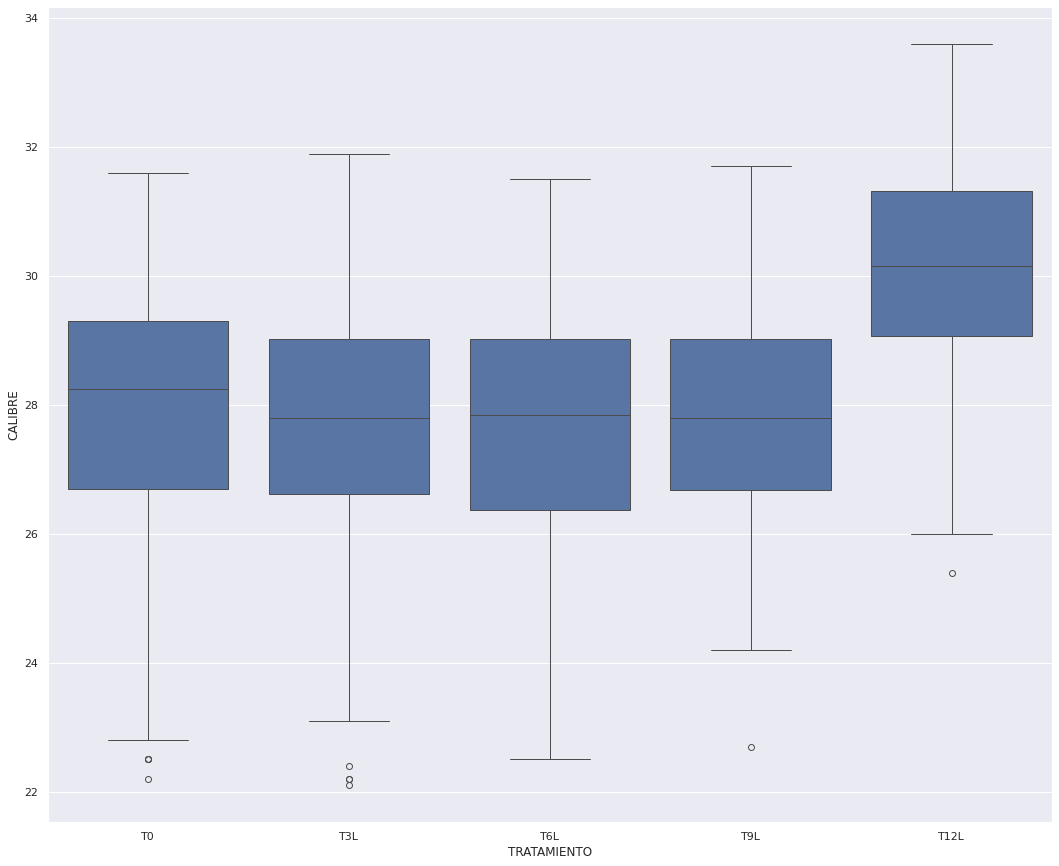

In [102]:
sns.boxplot(data=df, x="TRATAMIENTO", y="CALIBRE")

<Axes: xlabel='TRATAMIENTO', ylabel='BRIX'>

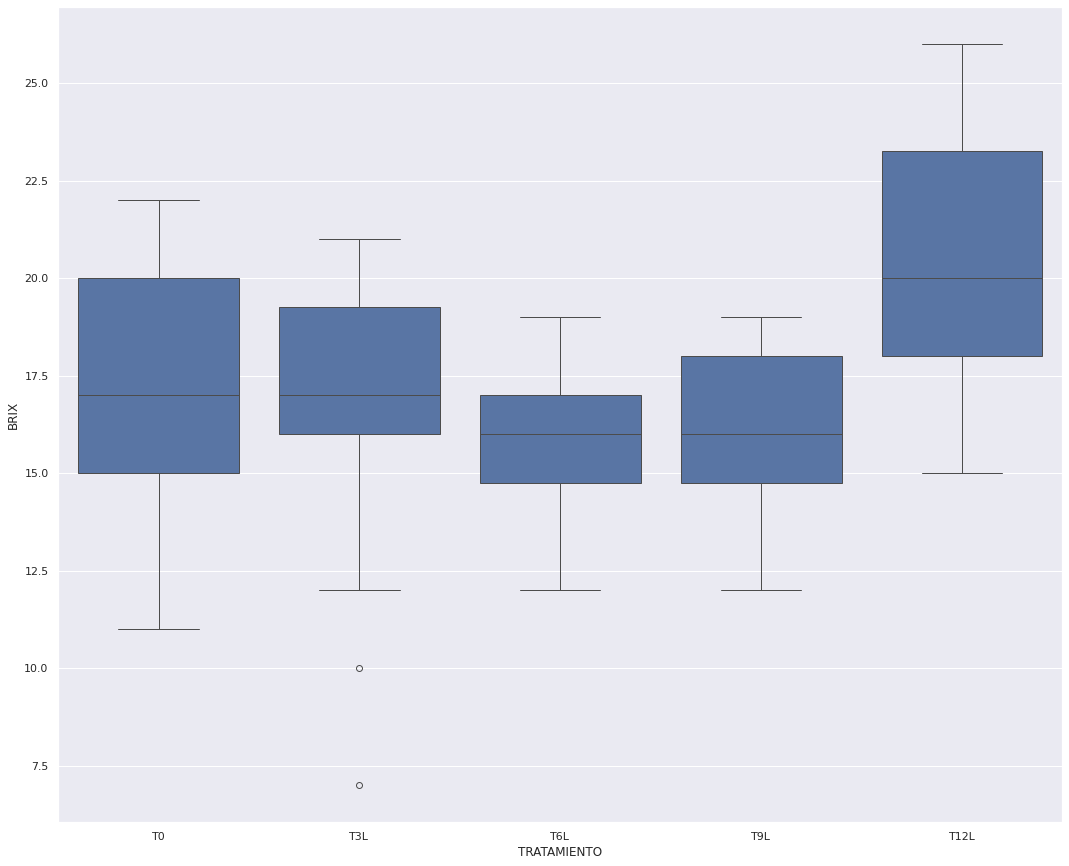

In [103]:
sns.boxplot(data=df, x="TRATAMIENTO", y="BRIX")

In [121]:
""" tratamientos = df.groupby('TRATAMIENTOS') """
df.TRATAMIENTO.unique()

array(['T0', 'T3L', 'T6L', 'T9L', 'T12L'], dtype=object)

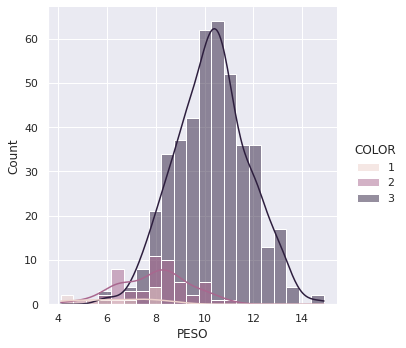

In [155]:
sns.displot(data=df, x="PESO", hue="COLOR", kde=True)

In [181]:
mod = ols('PESO ~ TRATAMIENTO + CALIBRE ', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
TRATAMIENTO,18.451399,4.0,7.309553,1.004889e-05
CALIBRE,899.463421,1.0,1425.295775,1.080631e-147
Residual,311.749279,494.0,NaN,NaN


In [169]:
mc = MultiComparison( df['PESO'], df['TRATAMIENTO'])
result = mc.tukeyhsd(0.05)
result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
T0,T12L,2.056,0.0,1.4503,2.6617,True
T0,T3L,0.163,0.9478,-0.4427,0.7687,False
T0,T6L,0.158,0.9532,-0.4477,0.7637,False
T0,T9L,0.228,0.8411,-0.3777,0.8337,False
T12L,T3L,-1.893,0.0,-2.4987,-1.2873,True
T12L,T6L,-1.898,0.0,-2.5037,-1.2923,True
T12L,T9L,-1.828,0.0,-2.4337,-1.2223,True
T3L,T6L,-0.005,1.0,-0.6107,0.6007,False
T3L,T9L,0.065,0.9984,-0.5407,0.6707,False
T6L,T9L,0.07,0.9978,-0.5357,0.6757,False


In [177]:
rp.summary_cont(df['PESO'].groupby(df['TRATAMIENTO']))

,N,Mean,SD,SE,95% Conf.,Interval
TRATAMIENTO,,,,,,
T0,100,9.424,1.7202,0.1720,9.0827,9.7653
T12L,100,11.480,1.4827,0.1483,11.1858,11.7742
T3L,100,9.587,1.6974,0.1697,9.2502,9.9238
T6L,100,9.582,1.4121,0.1412,9.3018,9.8622
T9L,100,9.652,1.4839,0.1484,9.3576,9.9464


In [179]:
stats.f_oneway(df['PESO'][df['TRATAMIENTO'] == 'T0'],
               df['PESO'][df['TRATAMIENTO'] == 'T3L'],
               df['PESO'][df['TRATAMIENTO'] == 'T6L'],
               df['PESO'][df['TRATAMIENTO'] == 'T9L'],
               df['PESO'][df['TRATAMIENTO'] == 'T12L'],
               )

F_onewayResult(statistic=30.379816030660848, pvalue=1.2591476581296452e-22)

In [182]:
result = stats.tukey_hsd(df['PESO'][df['TRATAMIENTO'] == 'T0'],
               df['PESO'][df['TRATAMIENTO'] == 'T3L'],
               df['PESO'][df['TRATAMIENTO'] == 'T6L'],
               df['PESO'][df['TRATAMIENTO'] == 'T9L'],
               df['PESO'][df['TRATAMIENTO'] == 'T12L'],)

In [184]:
print(result)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.163     0.948    -0.769     0.443
 (0 - 2)     -0.158     0.953    -0.764     0.448
 (0 - 3)     -0.228     0.841    -0.834     0.378
 (0 - 4)     -2.056     0.000    -2.662    -1.450
 (1 - 0)      0.163     0.948    -0.443     0.769
 (1 - 2)      0.005     1.000    -0.601     0.611
 (1 - 3)     -0.065     0.998    -0.671     0.541
 (1 - 4)     -1.893     0.000    -2.499    -1.287
 (2 - 0)      0.158     0.953    -0.448     0.764
 (2 - 1)     -0.005     1.000    -0.611     0.601
 (2 - 3)     -0.070     0.998    -0.676     0.536
 (2 - 4)     -1.898     0.000    -2.504    -1.292
 (3 - 0)      0.228     0.841    -0.378     0.834
 (3 - 1)      0.065     0.998    -0.541     0.671
 (3 - 2)      0.070     0.998    -0.536     0.676
 (3 - 4)     -1.828     0.000    -2.434    -1.222
 (4 - 0)      2.056     0.000     1.450     2.662
 (4 - 1)      1.893     0.000   